# TMA4215 - Assignment 4 - The trapezoidal method

**Deadline:** Wednesday October 7, 11:59PM

**For approval:** Upload a Jupyter Notebook in Blackboard with code/answers. Answer Control questions in Blackboard.

<font color="grey">**Problem 1.**

The Trapezoidal method for problems $y'=f(y)$ can be written in the form

$$
    u_{n+1} = u_n + \frac{h}{2}(f(u_n)+f(u_{n+1}))
$$

**(a)** Show how this method belongs both to the class of Runge-Kutta methods and the class of linear multistep methods, just by writing it down in the multistep format and give its Butcher tableaux as a Runge-Kutta method.

**(b)** Use the multistep format to derive an expression for the local truncation error of this method (it is sufficient to give the principal term). What is the order of this method?

**Control question 1.** what is the order of the method.

**Control question 2.** What is $a_{2,2}$ in the Butcher tableaux.

**(c)** Consider again the trapezoidal method above. Assume that $f$ has a Lipschitz constant $L$. We denote as usual the sequence of computed approximations by $u_1, u_2,\ldots$. At some grid point, $t=t_n$,
let the exact solution be $y(t_n)=y_n$ and assume that the trapezoidal rule applied to the starting value $y_n$ would result in an approximation $w_{n+1}$ at $t_{n+1}$. The difference $y_{n+1}-w_{n+1}$ is the local error and we assume that $\|y_{n+1}-w_{n+1}\|\leq Mh^{p+1}$ for a constant $M>0$ and a positive integer $p$.
Clearly we can write for the global error at $t_{n+1}$

$$
E_{n+1} := y_{n+1}-u_{n+1}= (y_{n+1}-w_{n+1})+(w_{n+1}-u_{n+1}) = \text{loc.err.} + (w_{n+1}-u_{n+1})
$$

Let us focus on the second term of the right hand side, show that

$$
\|w_{n+1}-u_{n+1}\| \leq \frac{1+\frac12 hL}{1-\frac12 hL} \|E_n\|
$$

Use this result to derive a bound for the global error $E_n$ at $t=t_n$ as a function of $h$, $L$, and $M$ for the trapzoidal rule.
</font>

The Trapezoidal method has the following Butcher tableaux:

$$
\begin{array}{c|rr}
0 & 0 & 0 \\
1 & \frac12 & \frac12 \\ \hline
        & \frac12 & \frac12
\end{array}
$$
and is thus a Runge-Kutta method. Furthermore, its multistep format is
$$
    1\cdot u_{n+1}-1\cdot u_n = h \left( \frac12 f_n + \frac12 f_{n+1}\right)
$$

It is clear that $\alpha_0 = -1, \alpha_1 = 1, \beta_0=\beta_1=\frac12$. We check if theorem holds for increasing $q$:

$$
\sum_{i=0}^k \alpha_i=-1+1=0 \\
q=1\implies \alpha_1-\Sigma \beta_i = 0 \iff 1-1 = 0 \\
q=2\implies \Sigma i^2 \alpha_i - 2 \Sigma b_i i = \alpha_1 -2 \beta_1 \iff 1-2\frac12=0 \\
q=3\implies \Sigma i^3 a_i - 3\Sigma b_i i^2 = \alpha_1-3\beta_1=1-\frac32\neq 0
$$

That is, the method has order 2.

**CQ1: 2**

**CQ2: $a_{22}=\frac12$**

**1c)** Will do when I get the time

**Problem 2.**

Consider the nonlinear pendulum problem

$$
\ddot{q} = - \sin q
$$

where $\ddot{q}=\frac{d^2q}{dt^2}$ (and similarly $\dot{q}=\frac{dq}{dt}$ etc).
Rewritten as a first order system

\begin{align*}
   \dot{q} &= p \\
   \dot{p} &= -\sin q
\end{align*}

You should now compare two methods applied to this problem, the first one is the Euler method.

\begin{align*}
q_{n+1} &= q_n + h p_n \\
p_{n+1} &= p_n - h \sin q_n
\end{align*}

The second is the symplectic Euler method

\begin{align*}
q_{n+1} &= q_n + h p_n \\
p_{n+1} &= p_n - h \sin q_{n+1}
\end{align*}

Write some python code which does the following (need not be general functions, the main goal is now just to produce two plots as specified below for the pendulum problem)

1. With intial values $q_0=1, p_0=0$, implement $N$ steps of both the Euler and symplectic Euler methods that takes you from $t=0$ to $t=T$ with stepsize $h$. Assume $T$ and $N$ specified, and set $h=T/N$. Store the whole history of approximations $(q_n,p_n),\ n=0,\ldots,N$ in a $(2,N)$ numpy array.
2. Run an experiment with $N=1000$ and $T=30$ (both methods).
3. Make two phase plots, i.e. plot $p_n$ vs $q_n$, for each of the two methods. Draw them as continuous lines and plot the initial point as a circle (or bullet).

**Control question 3.** For the Euler method, does the method produce (a) a closed curve (b) a curve that spirals inwards (decreasing radius) or (c) a curve that spirals outwards (increasing radius)


**Control question 4.** For the symplectic Euler method, does the method produce (a) a closed curve (b) a curve that spirals inwards (decreasing radius) or (c) a curve that spirals outwards (increasing radius)


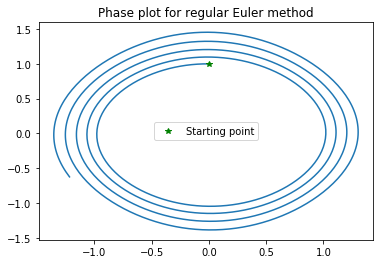

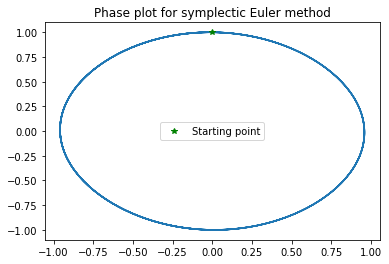

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def f(y):
    yn = np.zeros_like(y)
    yn[1] = y[0]
    yn[0] = -np.sin(y[1])
    return yn


def computeEulers(y0, N, T, t0=0):
    """Regular Euler method
    Input: function f(t,y), y0=[p0, q0], N=number of steps, T, last time step, t0 (optional), start step
    """
    # Initialize containers
    EU = np.zeros((2, N+1))
    SU = np.zeros((2, N+1))
    EU[:,0] = y0
    SU[:,0] = y0
    h = T / N
    for n in range(N):
        # Take a step with Euler
        EU[1,n+1] = EU[1,n] + h*EU[0,n]
        EU[0, n+1] = EU[0,n] - h*np.sin(EU[1,n])
        # Take a step with symplectic Euler
        SU[1, n+1] = SU[1, n] + h*SU[0, n]
        SU[0, n+1] = SU[0, n] - h*np.sin(SU[1,n+1])
    return EU, SU

## Excecute:
y0 = np.array([0, 1])
EU, SU = computeEulers(y0, 1000, 30)
plt.plot(EU[0,:], EU[1,:])
plt.plot(EU[0,0], EU[1,0], 'g*', label="Starting point")
plt.title("Phase plot for regular Euler method")
plt.legend()
plt.show()
plt.plot(SU[0,:], SU[1,:])
plt.plot(SU[0,0], SU[1,0], 'g*',label="Starting point")
plt.legend()
plt.title("Phase plot for symplectic Euler method")
plt.show()

**CQ3: (c)**

**CQ4: (a)**